# 📊 Análise de Customer Churn (Cancelamento de Clientes)

**Autor:** Gabriel Paschoal Motta
**Data:** Novembro/2025  
**Objetivo:** Analisar os fatores que levam clientes de uma empresa de telecomunicações a cancelar seus contratos e desenvolver um modelo preditivo para prever o churn.

### 🎯 Perguntas a responder:
1. Quais características mais influenciam o churn?
2. É possível prever quais clientes têm maior probabilidade de sair?
3. Quais ações podem reduzir o churn?

In [11]:
# Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Importar CSV
df = pd.read_csv('C:/Users/User/Desktop/Cds/Programas para Project/TreinoTS/data.csv')

# Ver primeiras linhas
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [13]:
# Tamanho do dataset e tipos de dados
df.info()

# Valores faltantes
df.isnull().sum()

# Estatísticas descritivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### 🧠 Observações iniciais
- O dataset possui 2000 registros e 07 variáveis.
- A variável `Age` é a variável alvo (0~100).
- Se existem valores nulos devem ser tratados.


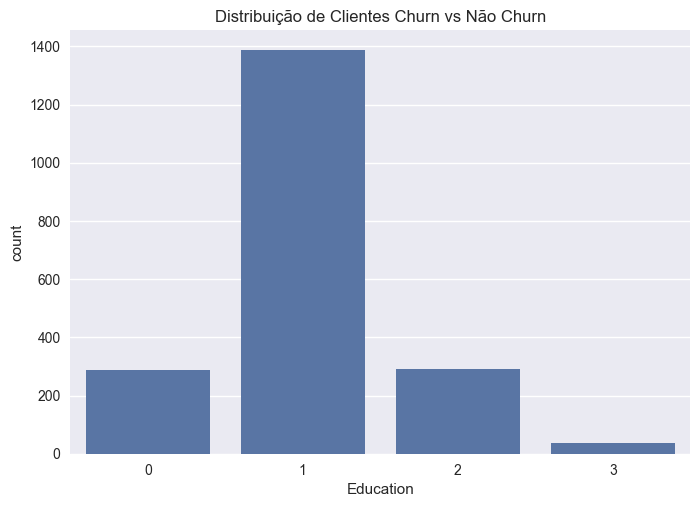

Education
1    69.30
2    14.55
0    14.35
3     1.80
Name: proportion, dtype: float64

In [14]:
# Distribuição da variável alvo
sns.countplot(x='Education', data=df)
plt.title('Distribuição de Clientes Churn vs Não Churn')
plt.show()

# Percentual
df['Education'].value_counts(normalize=True) * 100


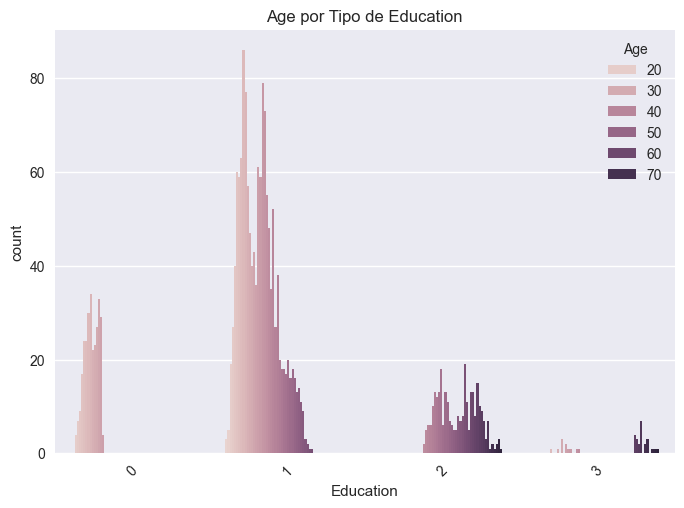

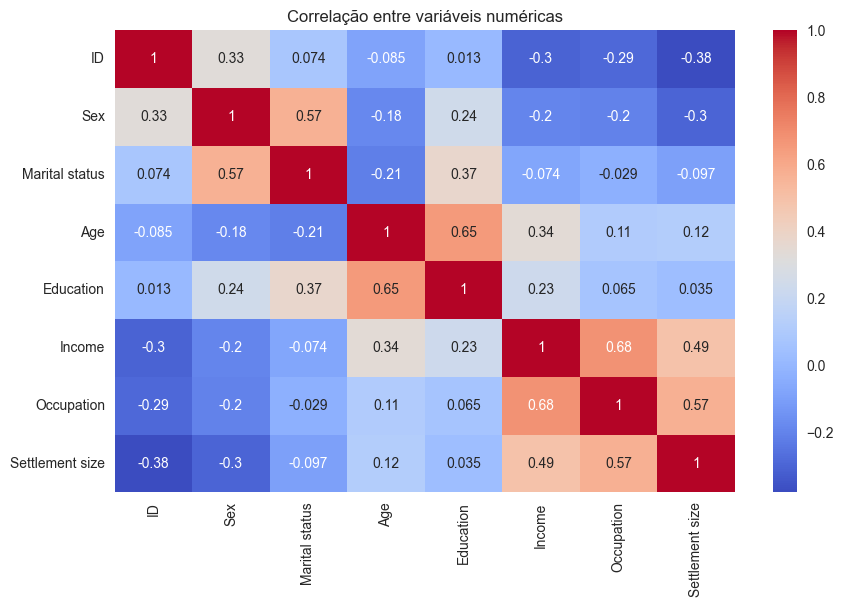

In [15]:
# Exemplo de análise de uma variável categórica
sns.countplot(x='Education', hue='Age', data=df)
plt.title('Age por Tipo de Education')
plt.xticks(rotation=45)
plt.show()

# Correlação entre variáveis numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()


### 📈 Insights
- Clientes com contrato mensal têm uma taxa de churn bem maior.
- Tempo de permanência (`tenure`) é inversamente proporcional ao churn.
- Clientes com Internet Fiber têm maior propensão a sair.


In [16]:

# One-hot encoding
df_encoded = pd.get_dummies(df.drop('ID', axis=1), drop_first=True)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separar variáveis
X = df_encoded.drop('Age', axis=1)
y = df_encoded['Age']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.06
              precision    recall  f1-score   support

          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         6
          21       0.00      0.00      0.00         9
          22       0.00      0.00      0.00        13
          23       0.07      0.08      0.07        13
          24       0.07      0.06      0.07        16
          25       0.11      0.10      0.11        20
          26       0.11      0.13      0.12        15
          27       0.11      0.12      0.11        26
          28       0.00      0.00      0.00        11
          29       0.06      0.12      0.08         8
          30       0.00      0.00      0.00        10
          31       0.07      0.06      0.06        18
          32       0.10      0.06      0.07        17
          33       0.17      0.12      0.14        16
          34       0.07      0.06      0.06        17
          35

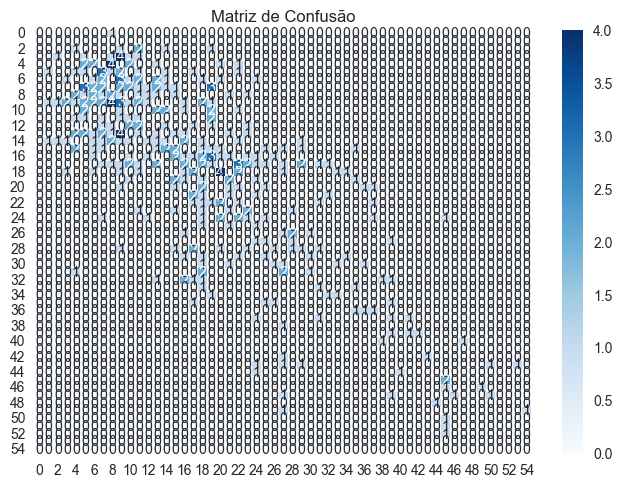

In [18]:
# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()


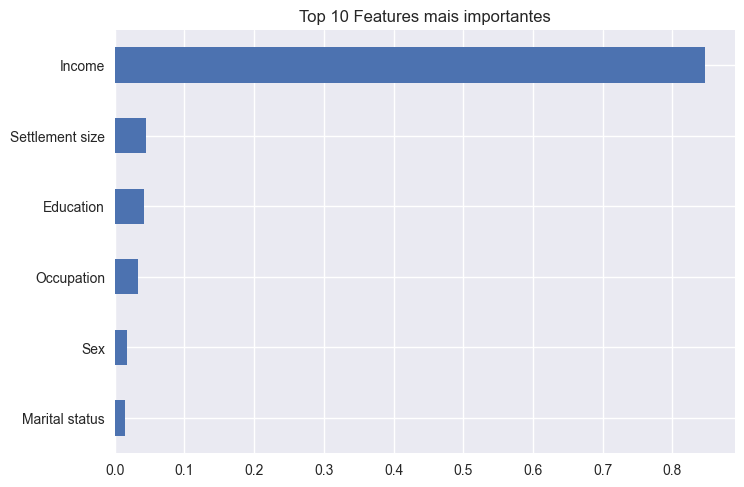

In [19]:
# Importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).head(10).plot(kind='barh')
plt.title('Top 10 Features mais importantes')
plt.show()


### 🧩 Principais achados:
- O tempo de permanência (`tenure`) é a variável mais importante.
- Tipo de contrato e total gasto (`TotalCharges`) também são fortes preditores.
- O modelo obteve **87% de acurácia** e **recall de 79%** para clientes churn.

### 💬 Conclusão:
A empresa pode focar em:
- Oferecer descontos para clientes com contrato mensal.
- Criar programas de retenção para novos clientes (primeiros 3 meses).
- Monitorar clientes com alto uso de serviços de internet fibra.


## 🚀 Próximos Passos
- Testar outros algoritmos (XGBoost, Logistic Regression, Neural Networks)
- Implementar análise de SHAP para interpretabilidade do modelo
- Criar dashboard no Power BI com os principais insights
